# Data Preprocessing 데이터 전처리

## Data Collection

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

- `np.column_stack((tuple) of [list])`: 전달받은 list를 일렬로 세운 다음 차례대로 나란히 연결

In [3]:
np.column_stack(([1, 2, 3], [4, 5, 6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [5]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=814
)

- 입력 data 크기 확인

In [7]:
train_input.shape, test_input.shape

((36, 2), (13, 2))

In [8]:
train_target.shape, test_target.shape

((36,), (13,))

In [9]:
test_target

array([0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.])

- 무작위로 데이터 나누었을때: 샘플링 편향 발생할 수 있다!
    
    - `stratify` parameter: target data 전달 $\rightarrow$ class 비율에 맞게 split data

In [10]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=814
)

test_target

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.])

## Training Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

## Evaluating Model

In [12]:
kn.score(test_input, test_target)

C:\Users\EthanJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

## Additional Data

In [13]:
sample = [25, 150]

In [14]:
kn.predict([sample])

C:\Users\EthanJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0.])

### scatter plot

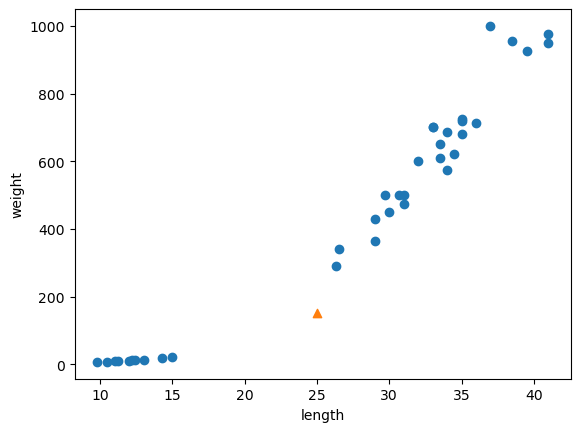

In [15]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(sample[0], sample[1], marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

- scatter plot상으로 도미 데이터(1)에 가깝게 보임 $\rightarrow$ model은 빙어 데이터(0)으로 판단

    - k-NN 알고리즘은 주변의 sample중에서 다수의 class를 predict로 사용
    
        - `kneighbors()`: 이웃까지 distance와 이웃 sample의 index를 반환하는 method > defualt 5개의 이웃 data

In [16]:
distances, indices = kn.kneighbors([sample])

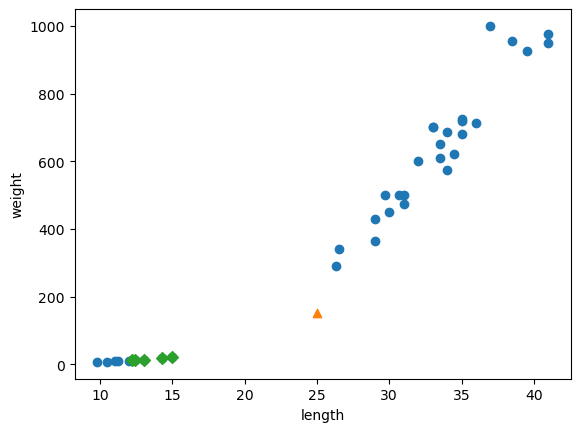

In [17]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(sample[0], sample[1], marker='^')
plt.scatter(train_input[indices, 0], train_input[indices, 1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

- 가장 가까운 이웃에 빙어 data 5개 인식됨

In [18]:
train_input[indices]

array([[[15. , 19.9],
        [14.3, 19.7],
        [12.4, 13.4],
        [13. , 12.2],
        [12.2, 12.2]]])

In [19]:
train_target[indices]

array([[0., 0., 0., 0., 0.]])

- 그렇다면 `distances` 배열에는 어떤 data?

In [20]:
distances

array([[130.48375378, 130.73859415, 137.17988191, 138.32150953,
        138.39320793]])

- 그래프상의 x축 범위(10 ~ 40)과 y축 범위(0 ~ 1000)가 엄청난 차이를 가진다!

    - y축으로 조금만 멀어져도 거리가 아주 큰 값으로 나온다
    
        - x축 범위를 y축 범위와 동일하게 지정한다면?

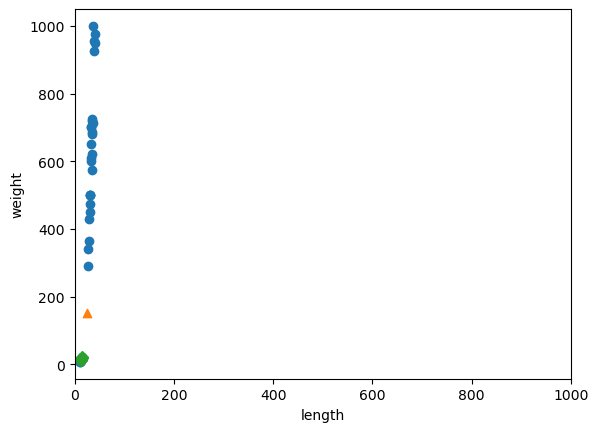

In [21]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(sample[0], sample[1], marker='^')
plt.scatter(train_input[indices, 0], train_input[indices, 1], marker='D')

plt.xlim((0, 1000))

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

- scatter plot이 거의 일직선으로 나타남 $\rightarrow$ x축보다 y축의 data가 classifier의 중요한 기준

    - 두 feature의 값이 놓인 범위가 다르다 == 두 feature의 `scale`이 다르다
    
        - 데이터를 표현하는 기준이 다르다 $\rightarrow$ 알고리즘의 예측력 하락, 특히 k-NN같은 거리 기반 알고리즘

## 데이터 전처리:Data Preprocessing
> 특성값(features)을 일정한 기준으로 맞춰주는 작업

- 가장 널리 사용하는 전처리 방법 중 하나: 표준점수(standard score, z-score)
    
    >  표준점수:  각 feature value($x$)가 평균($\mu$)에서 표준편차($\sigma$)의 몇 배만큼 떨어져 있는지 나타내는 값    
    - $ z = \frac{x - \mu}{\sigma} $

In [22]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

mean, std

(array([ 27.50277778, 465.35833333]), array([ 10.11474408, 327.27354459]))

In [23]:
train_z_scaled = (train_input - mean) / std

train_z_scaled[:10]

array([[ 0.74121719,  0.6558479 ],
       [ 0.59291883,  0.56418146],
       [-1.23609433, -1.36111929],
       [ 0.74121719,  0.79334756],
       [ 0.64235162,  0.67112564],
       [ 0.31609522,  0.10584927],
       [ 0.14802374, -0.31276079],
       [ 0.93894835,  1.63362324],
       [-1.51291794, -1.38464701],
       [ 0.34575489,  0.10584927]])

## Training Model

### scatter plot

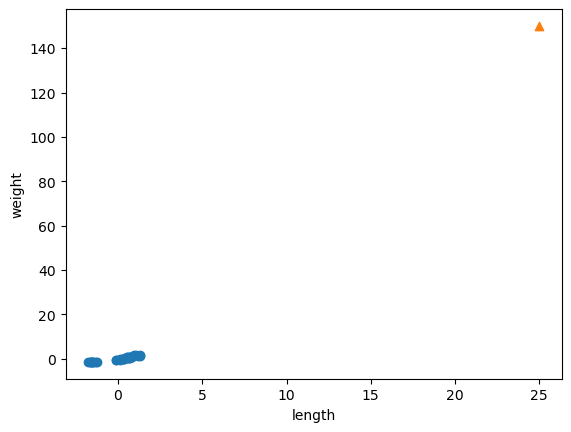

In [24]:
plt.scatter(train_z_scaled[:, 0], train_z_scaled[:, 1])
plt.scatter(sample[0], sample[1], marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

- 추가된 sample을 전처리 하지 않았기 때문에 제대로 scaled 되지 않음

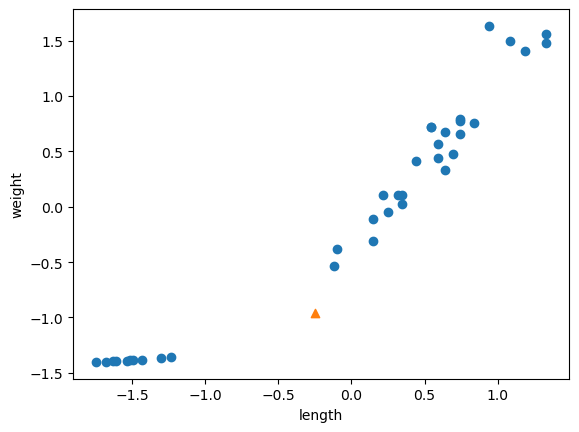

In [29]:
sample = (sample - mean) / std

plt.scatter(train_z_scaled[:, 0], train_z_scaled[:, 1])
plt.scatter(sample[0], sample[1], marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [31]:
kn.fit(train_z_scaled, train_target)

KNeighborsClassifier()

In [32]:
test_scaled = (test_input - mean) / std

In [33]:
kn.score(test_scaled, test_target)

C:\Users\EthanJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [34]:
kn.predict([sample])

C:\Users\EthanJ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1.])

### k-NN 최근접 이웃 산점도

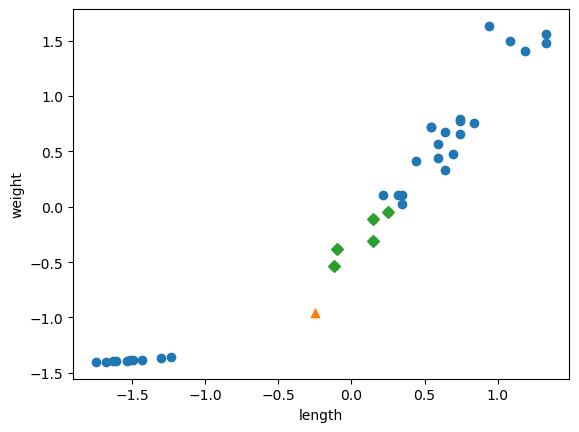

In [35]:
distances, indices = kn.kneighbors([sample])

plt.scatter(train_z_scaled[:, 0], train_z_scaled[:, 1])
plt.scatter(sample[0], sample[1], marker='^')
plt.scatter(train_z_scaled[indices, 0], train_z_scaled[indices, 1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()